# Named Entity Recognition
- NLP task to identify important named entities in the text
    - People, places, organizations
    - Dates, states, work of art
    - ... and other categories!

In [1]:
import nltk
nltk.download('punkt') # download the 'punkt' resource
nltk.download('averaged_perceptron_tagger') # download the 'averaged_perceptron_tagger' resource
sentence = '''In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''

# Tokenize the sentence
tokenized_sent = nltk.word_tokenize(sentence)

# Tag the sentence for parts of speech: add tags for proper nouns, pronouns, adjectives, verbs and other part of speech that NLTK uses based on an english grammer
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('In', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('the', 'DT'),
 ('Metro', 'NNP'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('MOMA', 'NNP'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('restaurants', 'NNS'),
 ('rated', 'VBN'),
 ('well', 'RB'),
 ('by', 'IN'),
 ('Ruth', 'NNP'),
 ('Reichl', 'NNP'),
 ('.', '.')]

In [2]:
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')

# Pass tagged sentence to ne_chunk(Named Entity Chunk) function
print(nltk.ne_chunk(tagged_sent))

[nltk_data] Downloading package words to /home/repl/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


In [3]:
# Check for stems of the tree with 'PERSON' tags
for chunk in nltk.ne_chunk(tagged_sent):
    if hasattr(chunk, "label") and chunk.label() == "PERSON":
            print(chunk)

(PERSON Ruth/NNP Reichl/NNP)


This tree shows the named entities tagged as their own chunks such as GPE or geopolitical entity for New York, or MOMA and Metro as organizations. It also identifies Ruth Reichl as a person. It does so without consulting a knowledge base, like wikipedia, but instead uses trained statistical and grammatical parsers.

# NER with NLTK

In [4]:
file_path = 'datasets/news_article/News articles/uber_apple.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the entire contents of the file
    uber = file.read()

In [5]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(uber)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)



(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


The `hasattr()` function is a built-in function in Python that allows you to check if an object has a particular attribute or method. It takes two arguments: the object you want to check and the name of the attribute or method you want to verify.

Here's the syntax of the `hasattr()` function:
`hasattr(object, attribute_name)`

# Visualizing NER with NLTK for wikipedia articles

In [6]:
file_path = 'datasets/WikiArticle/Wikipedia articles/wiki_text_computer.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the entire contents of the file
    computers = file.read()

In [8]:
from collections import defaultdict

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(computers)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = []
for each_sent in pos_sentences:
    chunked_sentences.append(nltk.ne_chunk(each_sent))

# Counting each tags
dict_ner = defaultdict(int)
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            dict_ner[chunk.label()] += 1

dict_ner

defaultdict(int,
            {'PERSON': 278,
             'ORGANIZATION': 393,
             'GPE': 203,
             'GSP': 3,
             'FACILITY': 3})

In [9]:
# Creating list of keys from the dict_ner
labels = list(dict_ner.keys())
labels

['PERSON', 'ORGANIZATION', 'GPE', 'GSP', 'FACILITY']

In [10]:
# Creating list of values from dict_ner
values = list(dict_ner.values())
values

[278, 393, 203, 3, 3]

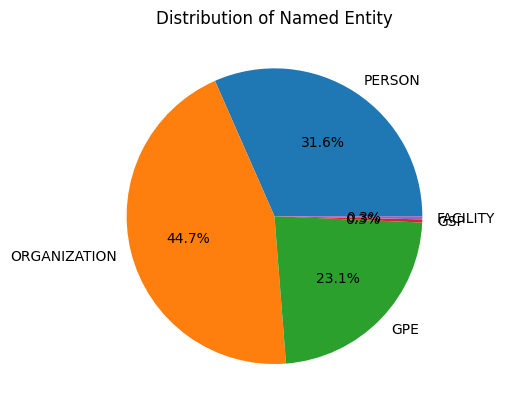

In [11]:
import matplotlib.pyplot as plt

# Create pie-chart representing each label along with their number of tags
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Named Entity')

# Display the chart
plt.show()

# Introduction to SpaCy
- NLP library similar to `gensim`, with different implementations
- Focus on creating NLP pipelines to generate models and corpora

In [12]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import spacy
from spacy.pipeline import EntityRecognizer

# Load into an object
nlp = spacy.load('en_core_web_sm')

# Entity Recognizer object from the pipeline module
entity_recognizer = nlp.get_pipe("ner")
entity_recognizer #<-- used to find entities in the text

2023-05-17 09:10:18.247810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-17 09:10:18.247838: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-17 09:10:18.247855: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0ec4904e-4f2c-41c7-aeb9-82fb12a6b906): /proc/driver/nvidia/version does not exist


In [14]:
# Load a new document by passing a string into the NLP variable
doc = nlp("Berlin is the capital of Germany; and the residence of Chancellor Angela Merkel.")
doc

Berlin is the capital of Germany; and the residence of Chancellor Angela Merkel.

In [15]:
# When the document is loaded, the named entities are stored as a document attribute called **ents**.
doc.ents

(Berlin, Germany, Angela Merkel)

In [16]:
# Investigate the labels of each entity by using indexing to pick out
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


# NER with SpaCy

In [17]:
file_path = 'datasets/news_article/News articles/uber_apple.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the entire contents of the file
    uber = file.read()

In [18]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

# Create a new document: doc
doc = nlp(uber)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORG Uber
ORG Apple’s
ORG Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


# Multilingual NER with polyglot
- NLP library which uses word vectors
- Why `polyglot`? --> Vectors for many different languages

In [19]:
file_path = 'datasets/news_article/News articles/french.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the entire contents of the file
    french = file.read()

In [20]:
pip install polyglot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install morfessor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
from polyglot.text import Text
from polyglot.downloader import Downloader

downloader = Downloader()
downloader.download("ner2.fr")

text = Text(french, hint_language_code='fr')

# Perform text processing tasks
print("Entities:", text.entities)

[polyglot_data] Downloading package ner2.fr to
[polyglot_data]     /home/repl/polyglot_data...
[polyglot_data]   Package ner2.fr is already up-to-date!
Entities: [I-PER(['Charles', 'Cuvelliez']), I-PER(['Charles', 'Cuvelliez']), I-ORG(['Bruxelles']), I-PER(['l’IA']), I-PER(['Julien', 'Maldonato']), I-ORG(['Deloitte']), I-PER(['Ethiquement']), I-LOC(['l’IA']), I-PER(['.'])]


In [42]:
from polyglot.text import Text

# Create a new text object using Polyglot's Text class: txt
txt = Text(french)
print(txt.entities)

print()

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

[I-PER(['Charles', 'Cuvelliez']), I-PER(['Charles', 'Cuvelliez']), I-ORG(['Bruxelles']), I-PER(['l’IA']), I-PER(['Julien', 'Maldonato']), I-ORG(['Deloitte']), I-PER(['Ethiquement']), I-LOC(['l’IA']), I-PER(['.'])]

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [43]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]
